# Preamble

In [1]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

import sys 
from os.path import abspath
path = abspath('..')

if path not in sys.path: 
    sys.path.insert(0, path)

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
from src.frames import plots
from src.utils import const
from src.frames import catalogs
from src.frames.params import Param
from src.visualization import plot_funcs
from src.visualization import plots1

import numpy as np
import matplotlib.pyplot as plt 

plt.rc("text", usetex=True)

# Load catalog, Check size

In [3]:
out_file = const.data_path.joinpath('processed/bolshoi_base1.csv')

In [4]:
# cat_file = const.data_path.joinpath('raw/bolshoi/hlist_1.00035.csv')
# hcat = catalogs.HaloCatalog(cat_file, "Bolshoi", verbose=True, subhalos=False)

# # load catalog 
# hcat.load_base_cat()

# # save base cat for future use. 
# hcat.save_cat(out_file)

In [5]:
#reload 
hcat = catalogs.HaloCatalog.create_from_saved_cat(out_file, "Bolshoi", verbose=True, subhalos=False)

print(hcat.get_cat().colnames)
print("number of MB being used as estimated in numpy: ", np.array(hcat.get_cat()).nbytes/1e6)

['id', 'mvir', 'rvir', 'rs', 'Xoff', 'Voff', 'vrms', 'Acc_Rate_1*Tdyn', 'Acc_Rate_Inst', 'T/|U|', 'Spin', 'scale_of_last_MM', 'cvir', 'eta', 'q', 'phi_l', 'xoff', 'voff', 'upid']
number of MB being used as estimated in numpy:  51.290576


(array([1.85294e+05, 8.45670e+04, 3.84560e+04, 1.70620e+04, 7.38700e+03,
        3.01600e+03, 1.13400e+03, 4.03000e+02, 1.14000e+02, 5.00000e+00]),
 array([11.13065535, 11.52192604, 11.91319673, 12.30446743, 12.69573812,
        13.08700881, 13.47827951, 13.8695502 , 14.26082089, 14.65209159,
        15.04336228]),
 <a list of 10 Patch objects>)

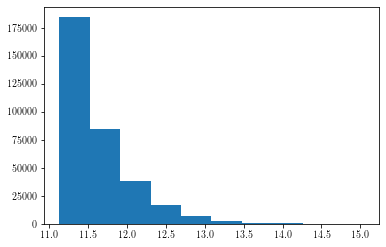

In [6]:
#sanity check masses look ok. 
plt.hist(np.log10(hcat.get_cat()['mvir']))

# Tests

## frames 

In [8]:
from src.frames import filters

In [9]:
#check that everything works as expected. 
print(len(hcat))
hcat.with_filters(filters.catalog_mass_filter(hcat.catalog_name))
print(len(hcat))
hcat.reset_base_cat()
print(len(hcat))

337438
336687
337438


## sanity check relaxedness

213058
337438


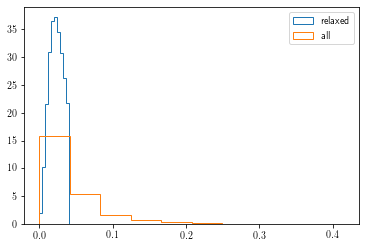

In [70]:
hcat.with_relaxed_filters("power2011")
print(len(hcat))
plt.hist(hcat.get_cat()['xoff'], label='relaxed', histtype='step', density=True)

hcat.reset_base_cat()
print(len(hcat))

plt.hist(hcat.get_cat()['xoff'], label='all', histtype='step', density=True)
plt.legend()

## Plotting demo

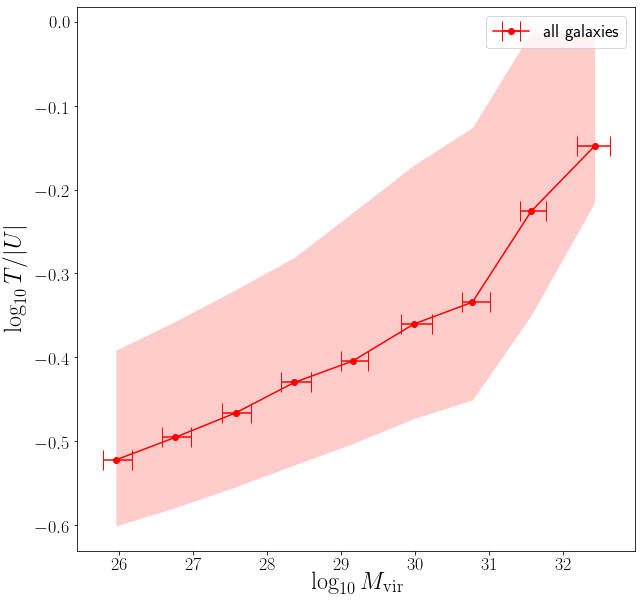

In [26]:
plt.rc("text", usetex=True)
bparams = [(Param('mvir', log=True), Param('T/|U|', log=True))]
bplot = plots.BiPlot(plot_funcs.scatter_binning, bparams, nrows=1, ncols=1)
bplot.run(hcat.cat, nxbins=10, xlabel_size=24, ylabel_size=24, tick_size=18, no_bars=True, show_bands=True,
              legend_label='all galaxies')
bplot.save("test1.png")

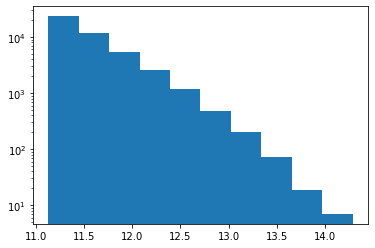

In [10]:
plt.hist(np.log10(hcat.cat['mvir']))
plt.yscale('log')

In [11]:
len(hcat.cat)

45039

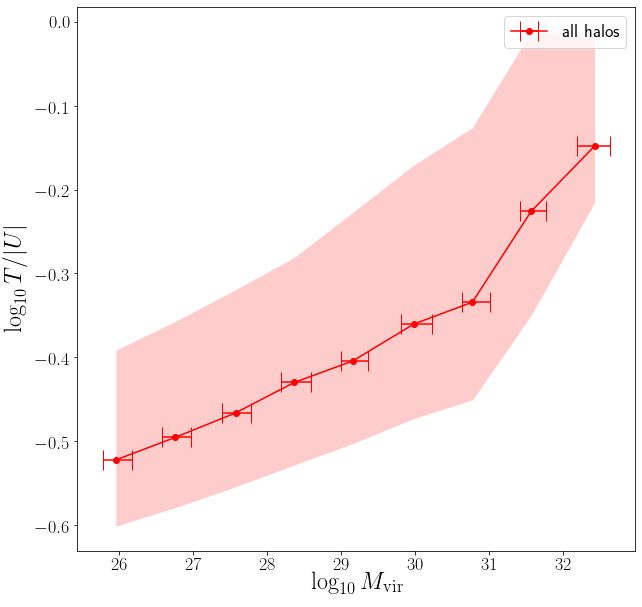

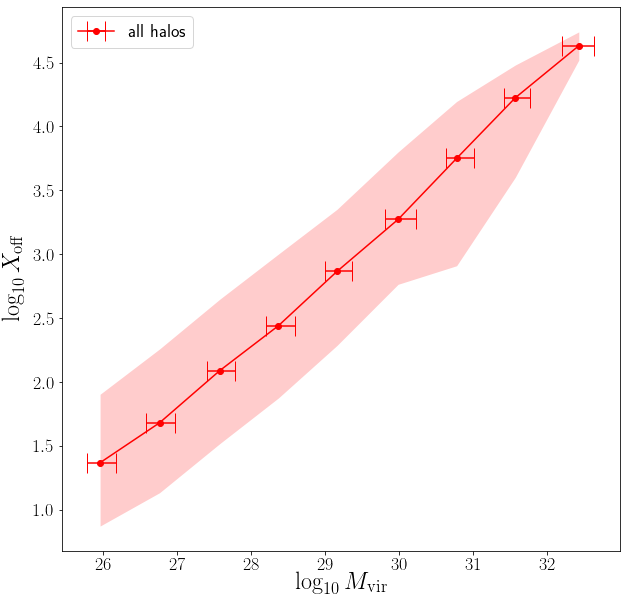

In [33]:
plots1.test_plot(hcat=hcat)

## Plot test 1 demo

In [10]:
plt.rc("text", usetex=True)

In [11]:
hist_kwargs1 = dict(bins=30, histtype='step')
binning_kwargs1 = dict(nxbins=10, no_bars=True, show_bands=True)
general_kwargs1 = dict(xlabel_size=28, ylabel_size=28)

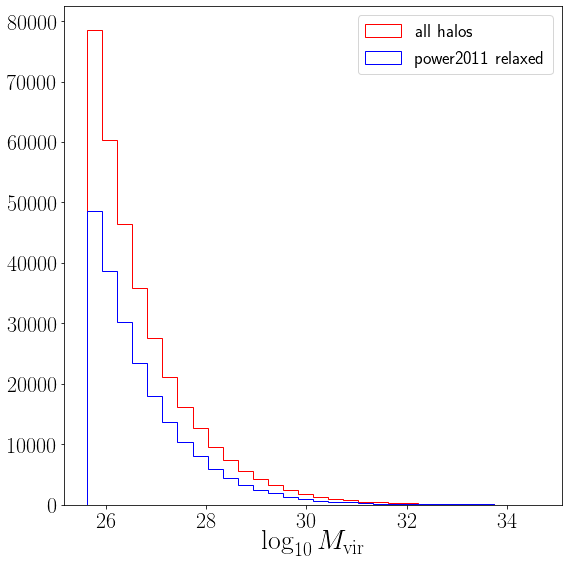

In [64]:
# (1) histogram
params = [Param('mvir', log=True)]
uplot1 = plots.UniPlot(plot_funcs.histogram, params, nrows=1, ncols=1, tick_size=22)
hcat.reset_base_cat()

uplot1.generate(hcat.get_cat(), legend_label=hcat.catalog_label, color='r', **hist_kwargs1, **general_kwargs1)

hcat.with_relaxed_filters("power2011")
uplot1.generate(hcat.get_cat(), legend_label=hcat.catalog_label, color='b', **hist_kwargs1, **general_kwargs1)


## Test caching

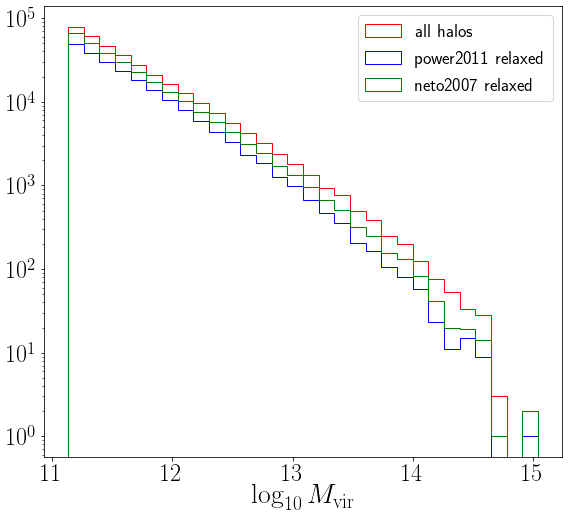

In [28]:
params = [Param('mvir', log=True)]
colors = ['r','b', 'g']
general_kwargs = dict(xlabel_size=28, ylabel_size=28)
hist_kwargs = dict(bins=30, histtype='step', extra_hist_kwargs=dict(), log_y=True, **general_kwargs)
plot1 = plots.Histogram(plot_funcs.histogram, params, nrows=1, ncols=1, plot_kwargs=hist_kwargs)
hcats = [hcat, 
         catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'power2011'), 
         catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'neto2007')]

for _hcat, color in zip(hcats, colors) : 
    plot1.load_arguments(_hcat.get_cat(), legend_label=_hcat.catalog_label, color=color)

plot1.generate_from_cached()


# Make all plots 

In [7]:
from matplotlib.backends.backend_pdf import PdfPages

In [8]:
hcats = [hcat, catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'power2011'), 
         catalogs.HaloCatalog.create_relaxed_from_base(hcat, 'neto2007')]
colors = ['r','b', 'g']
print([len(hcat1) for hcat1 in hcats])

[337438, 213058, 277427]


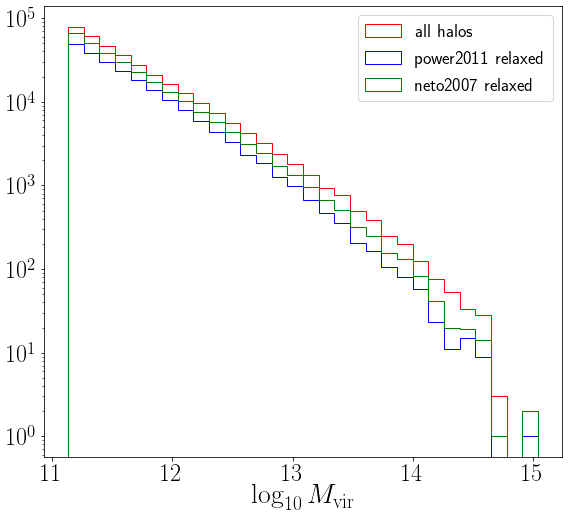

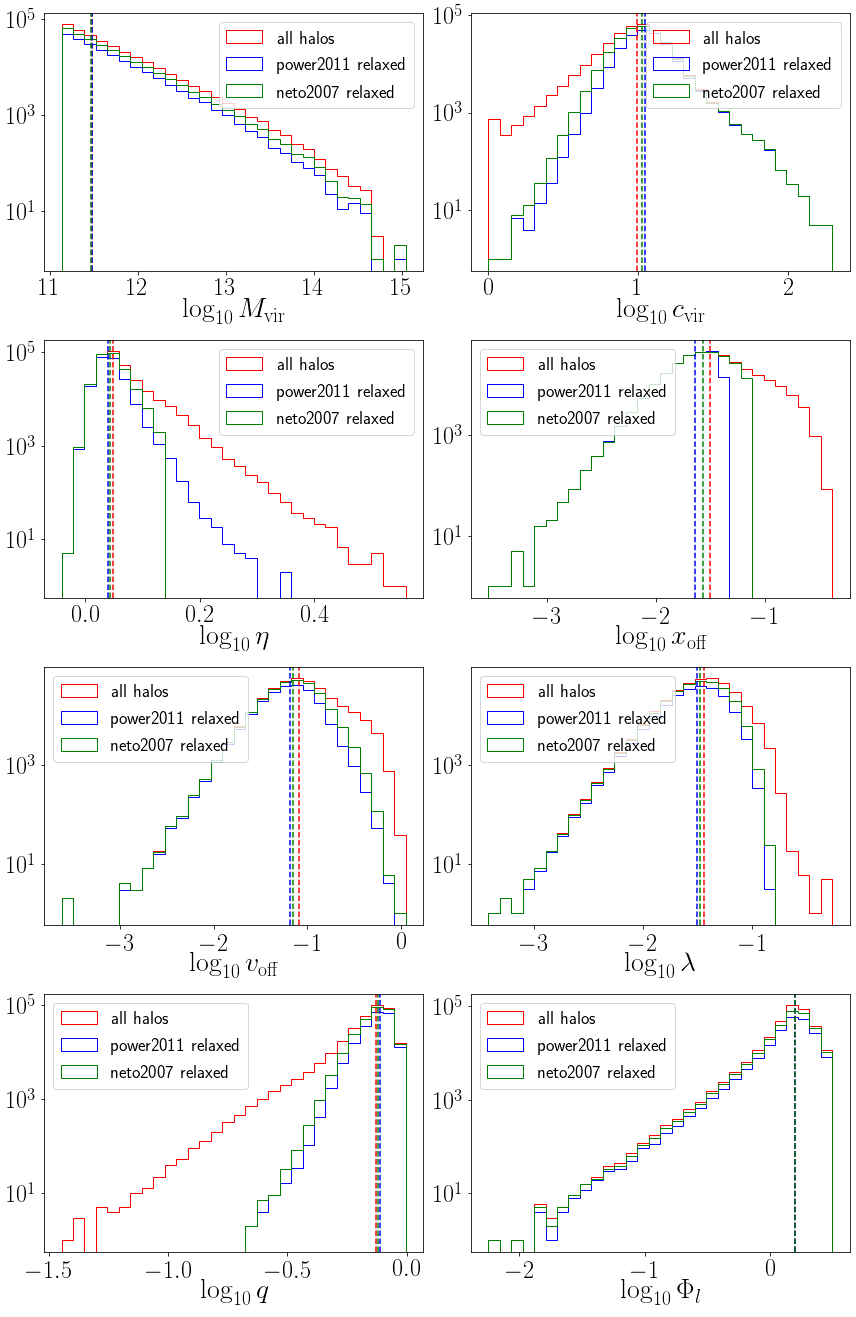

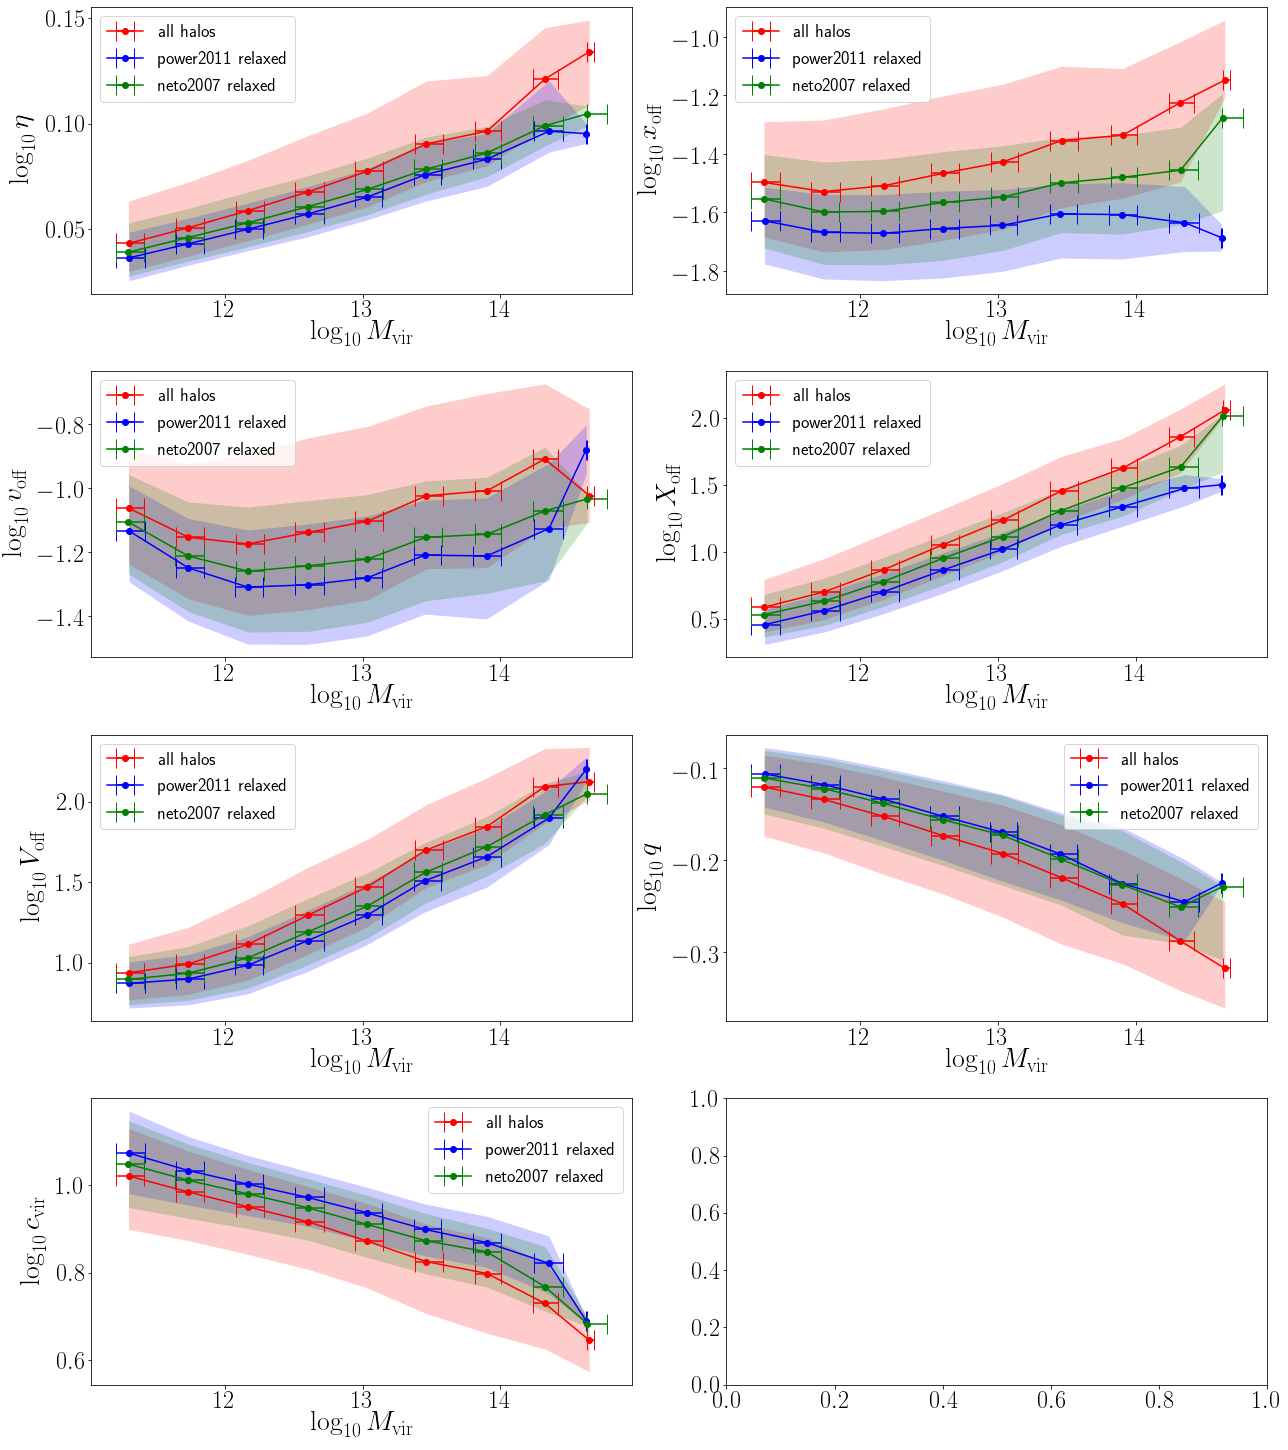

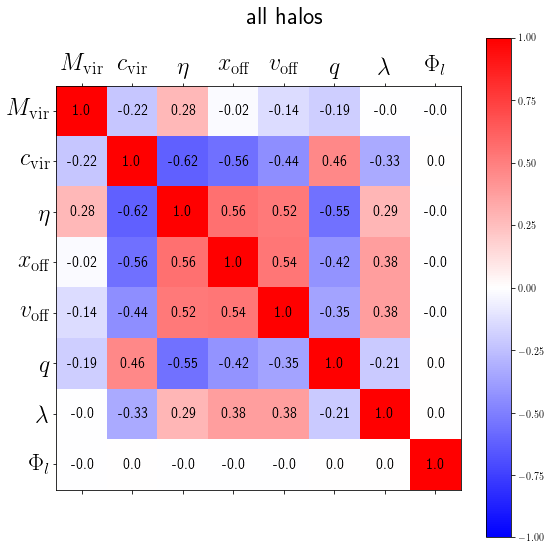

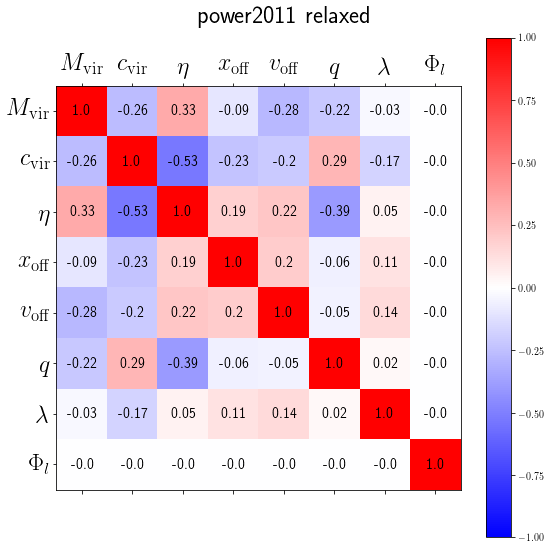

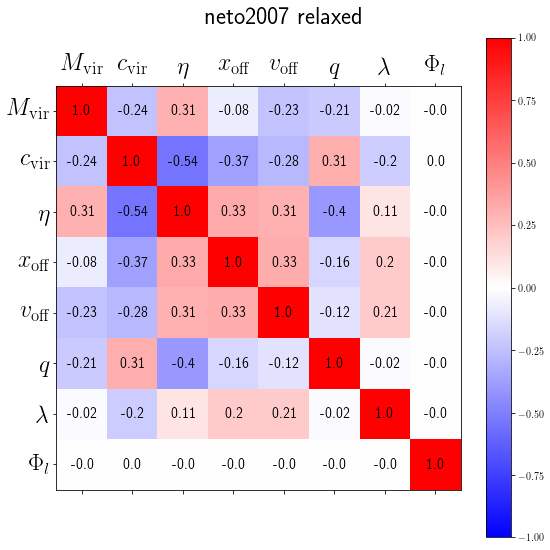

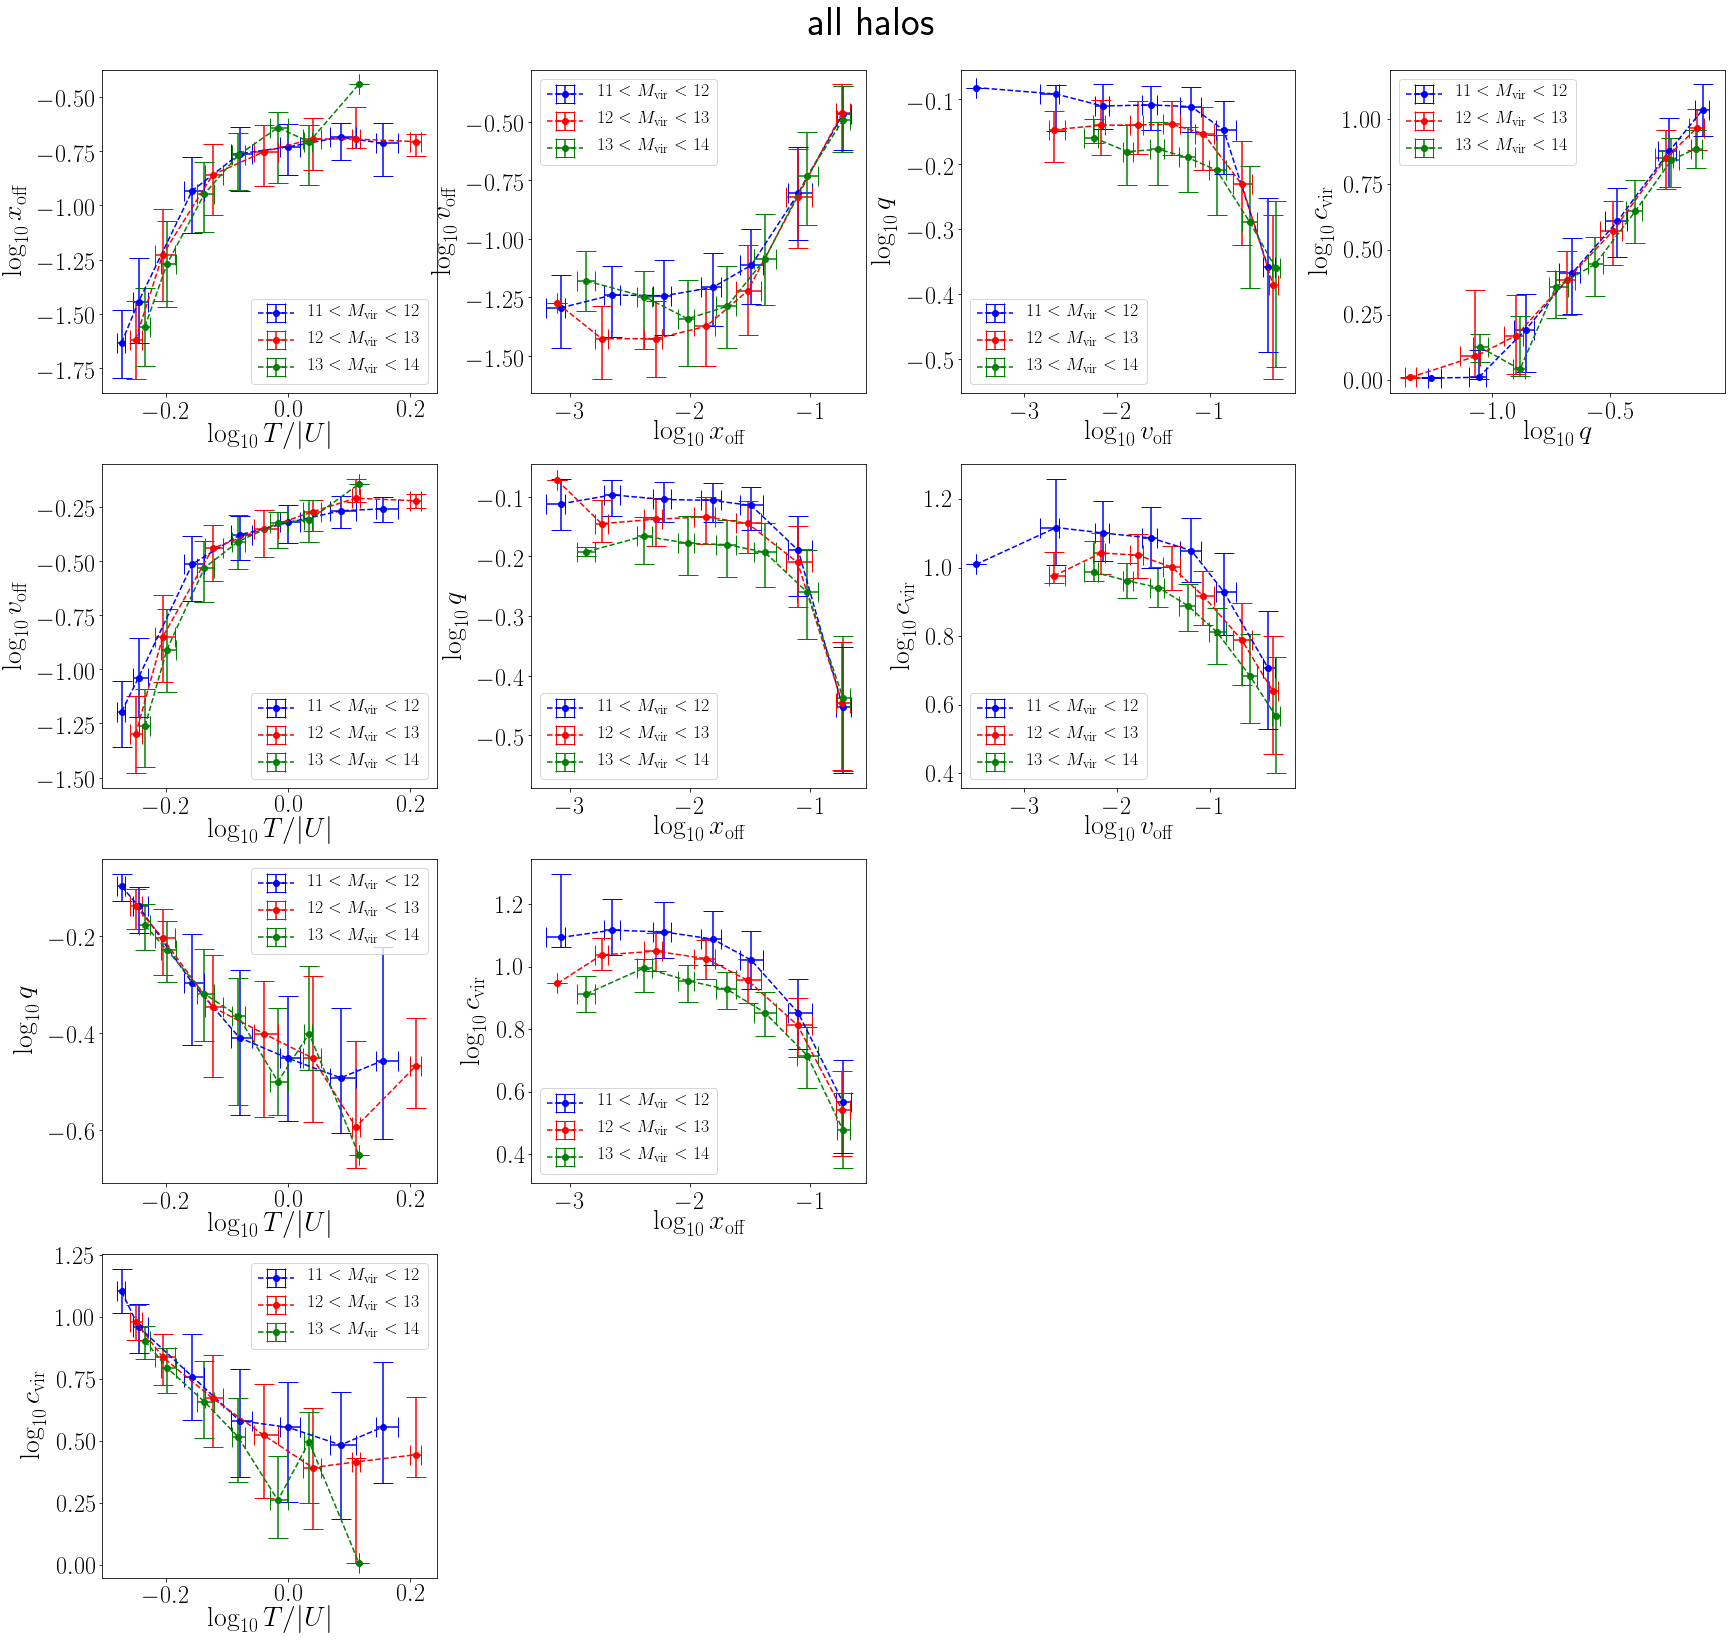

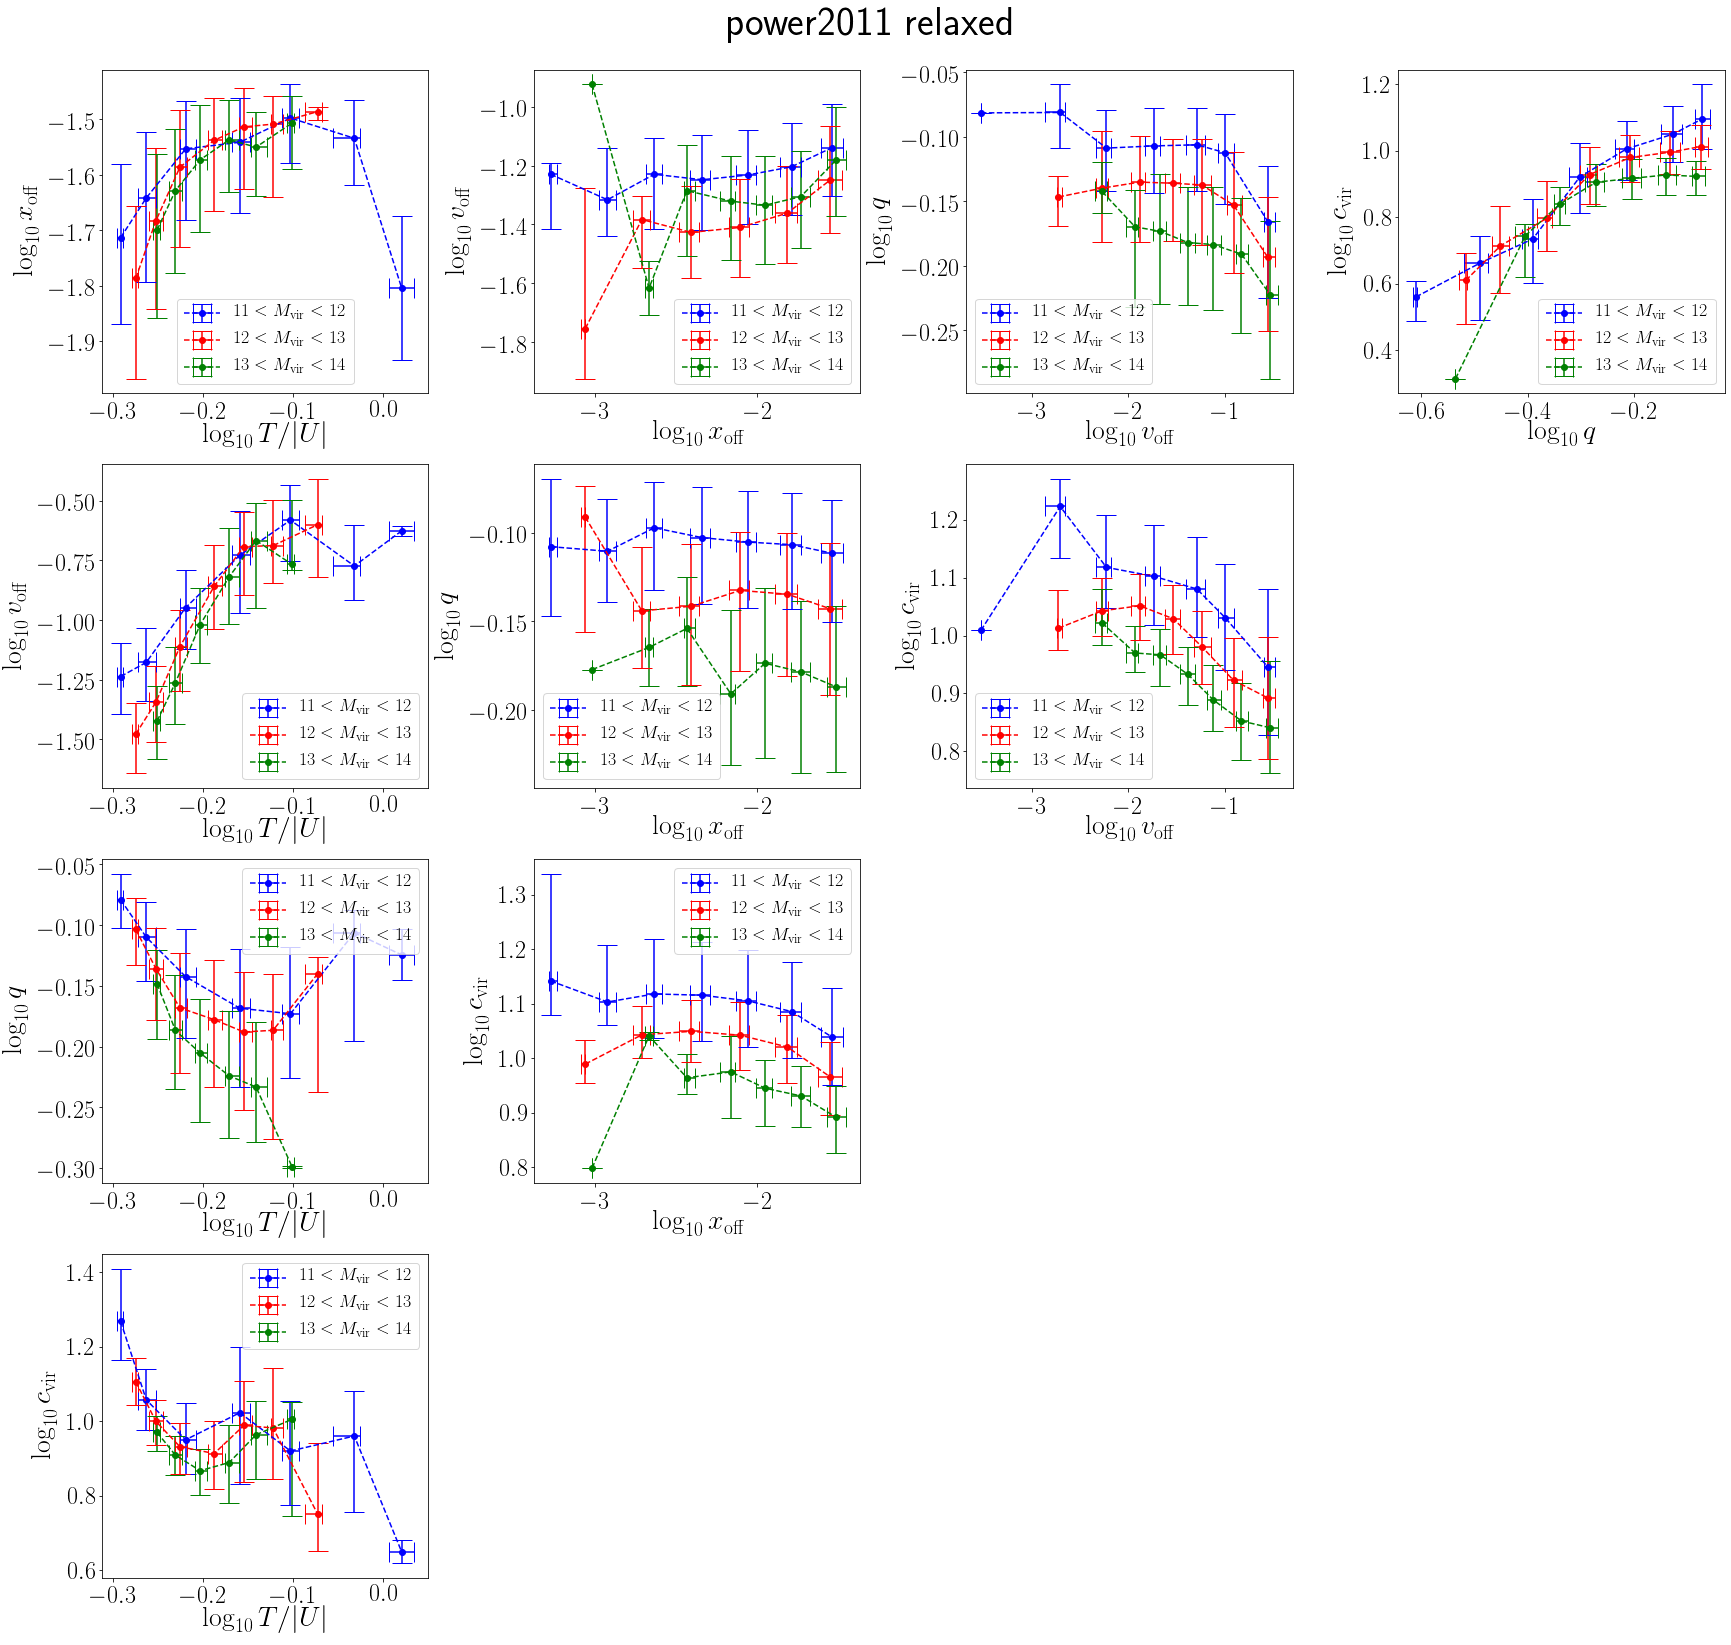

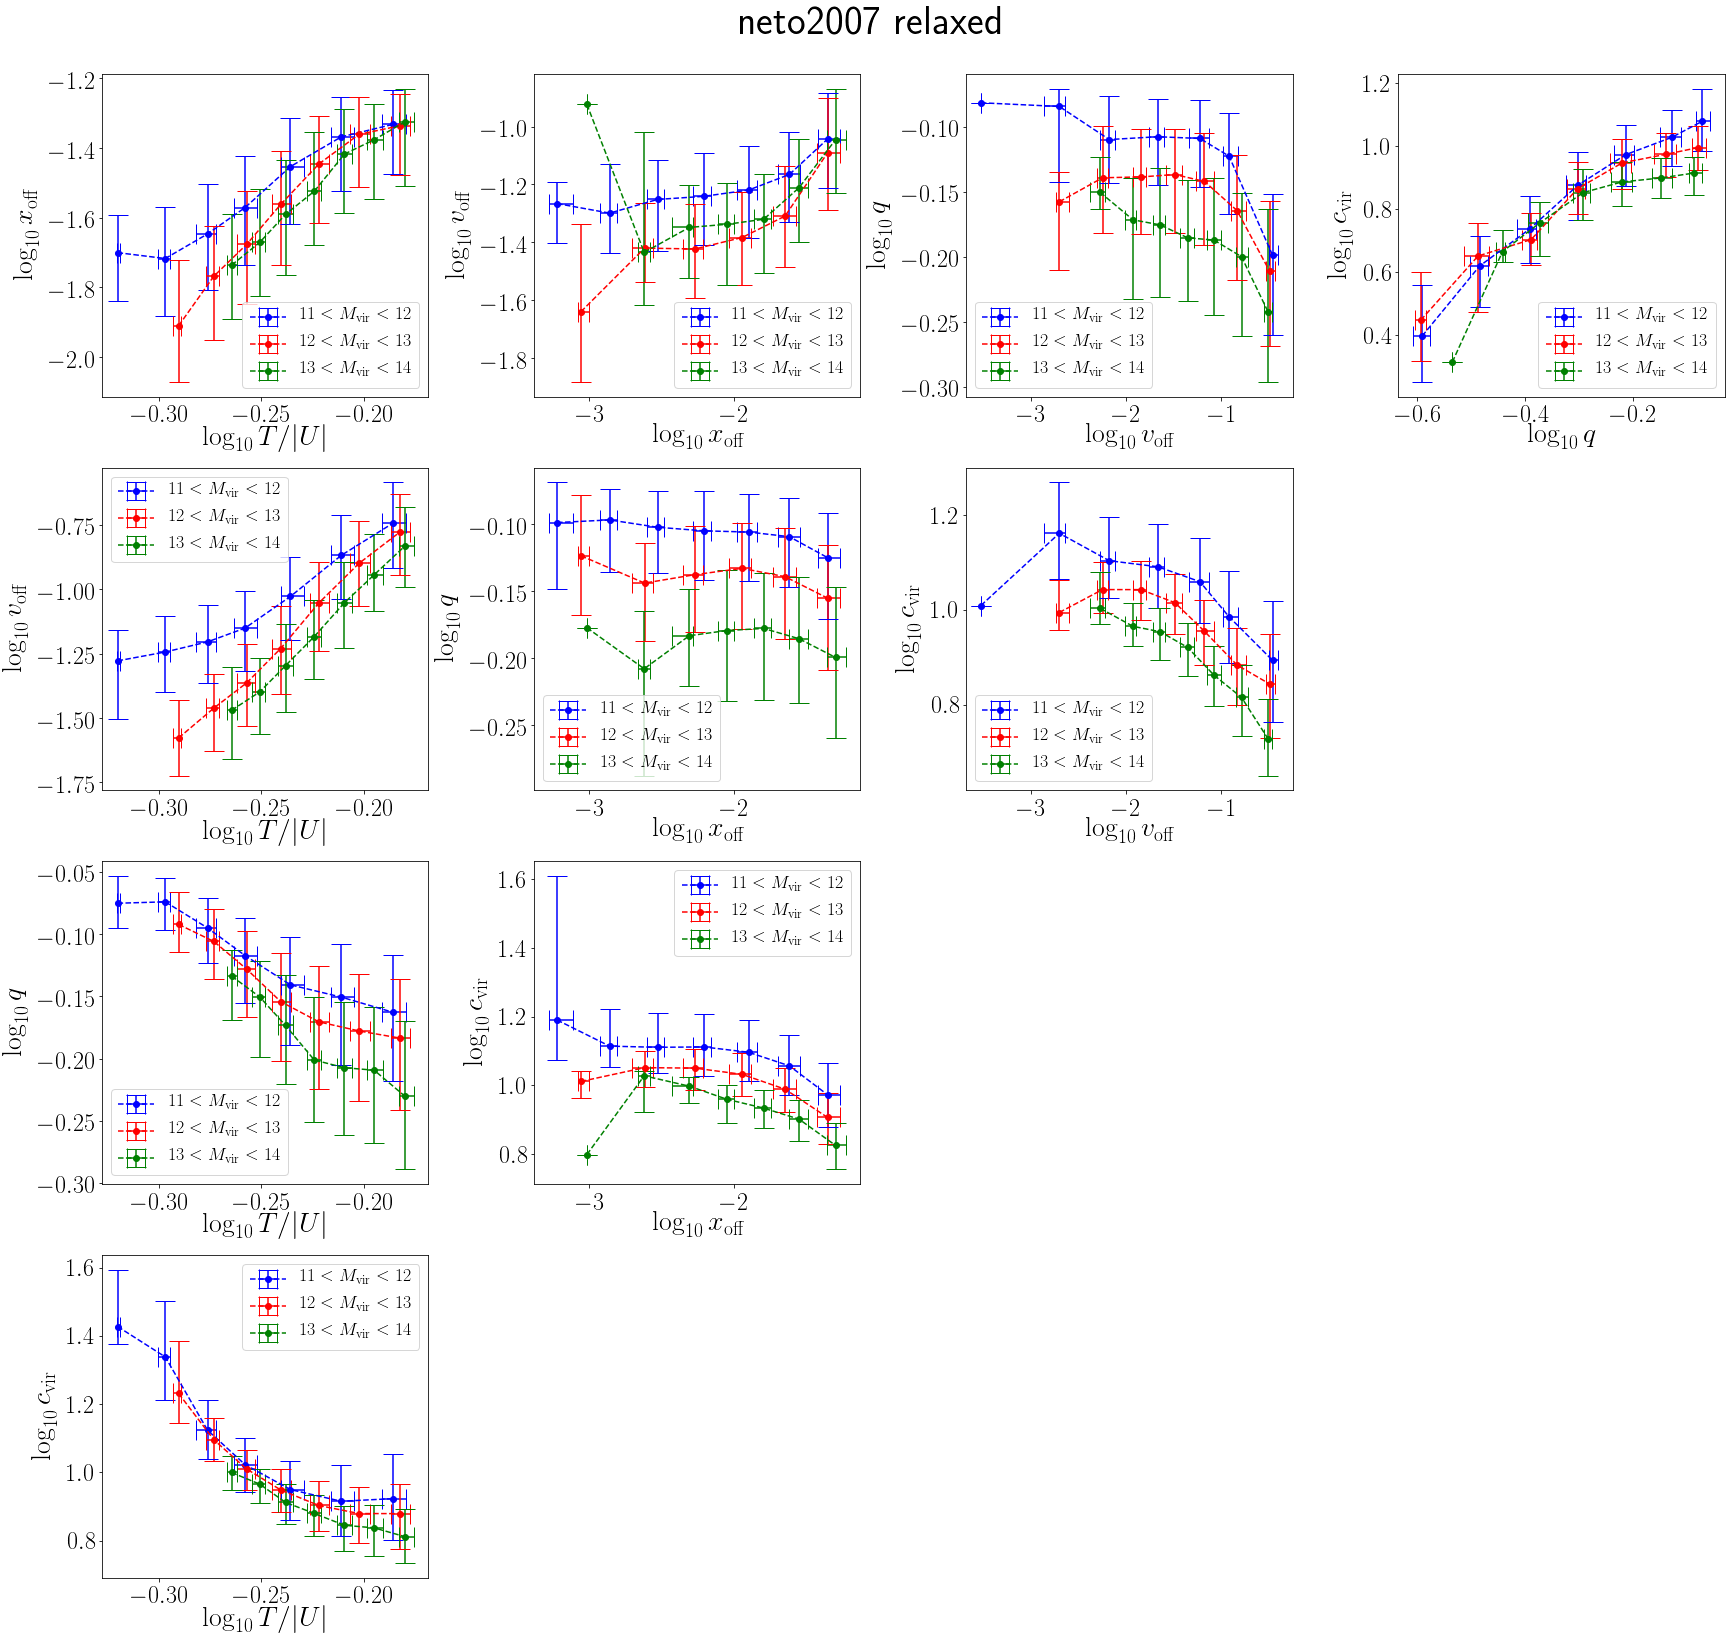

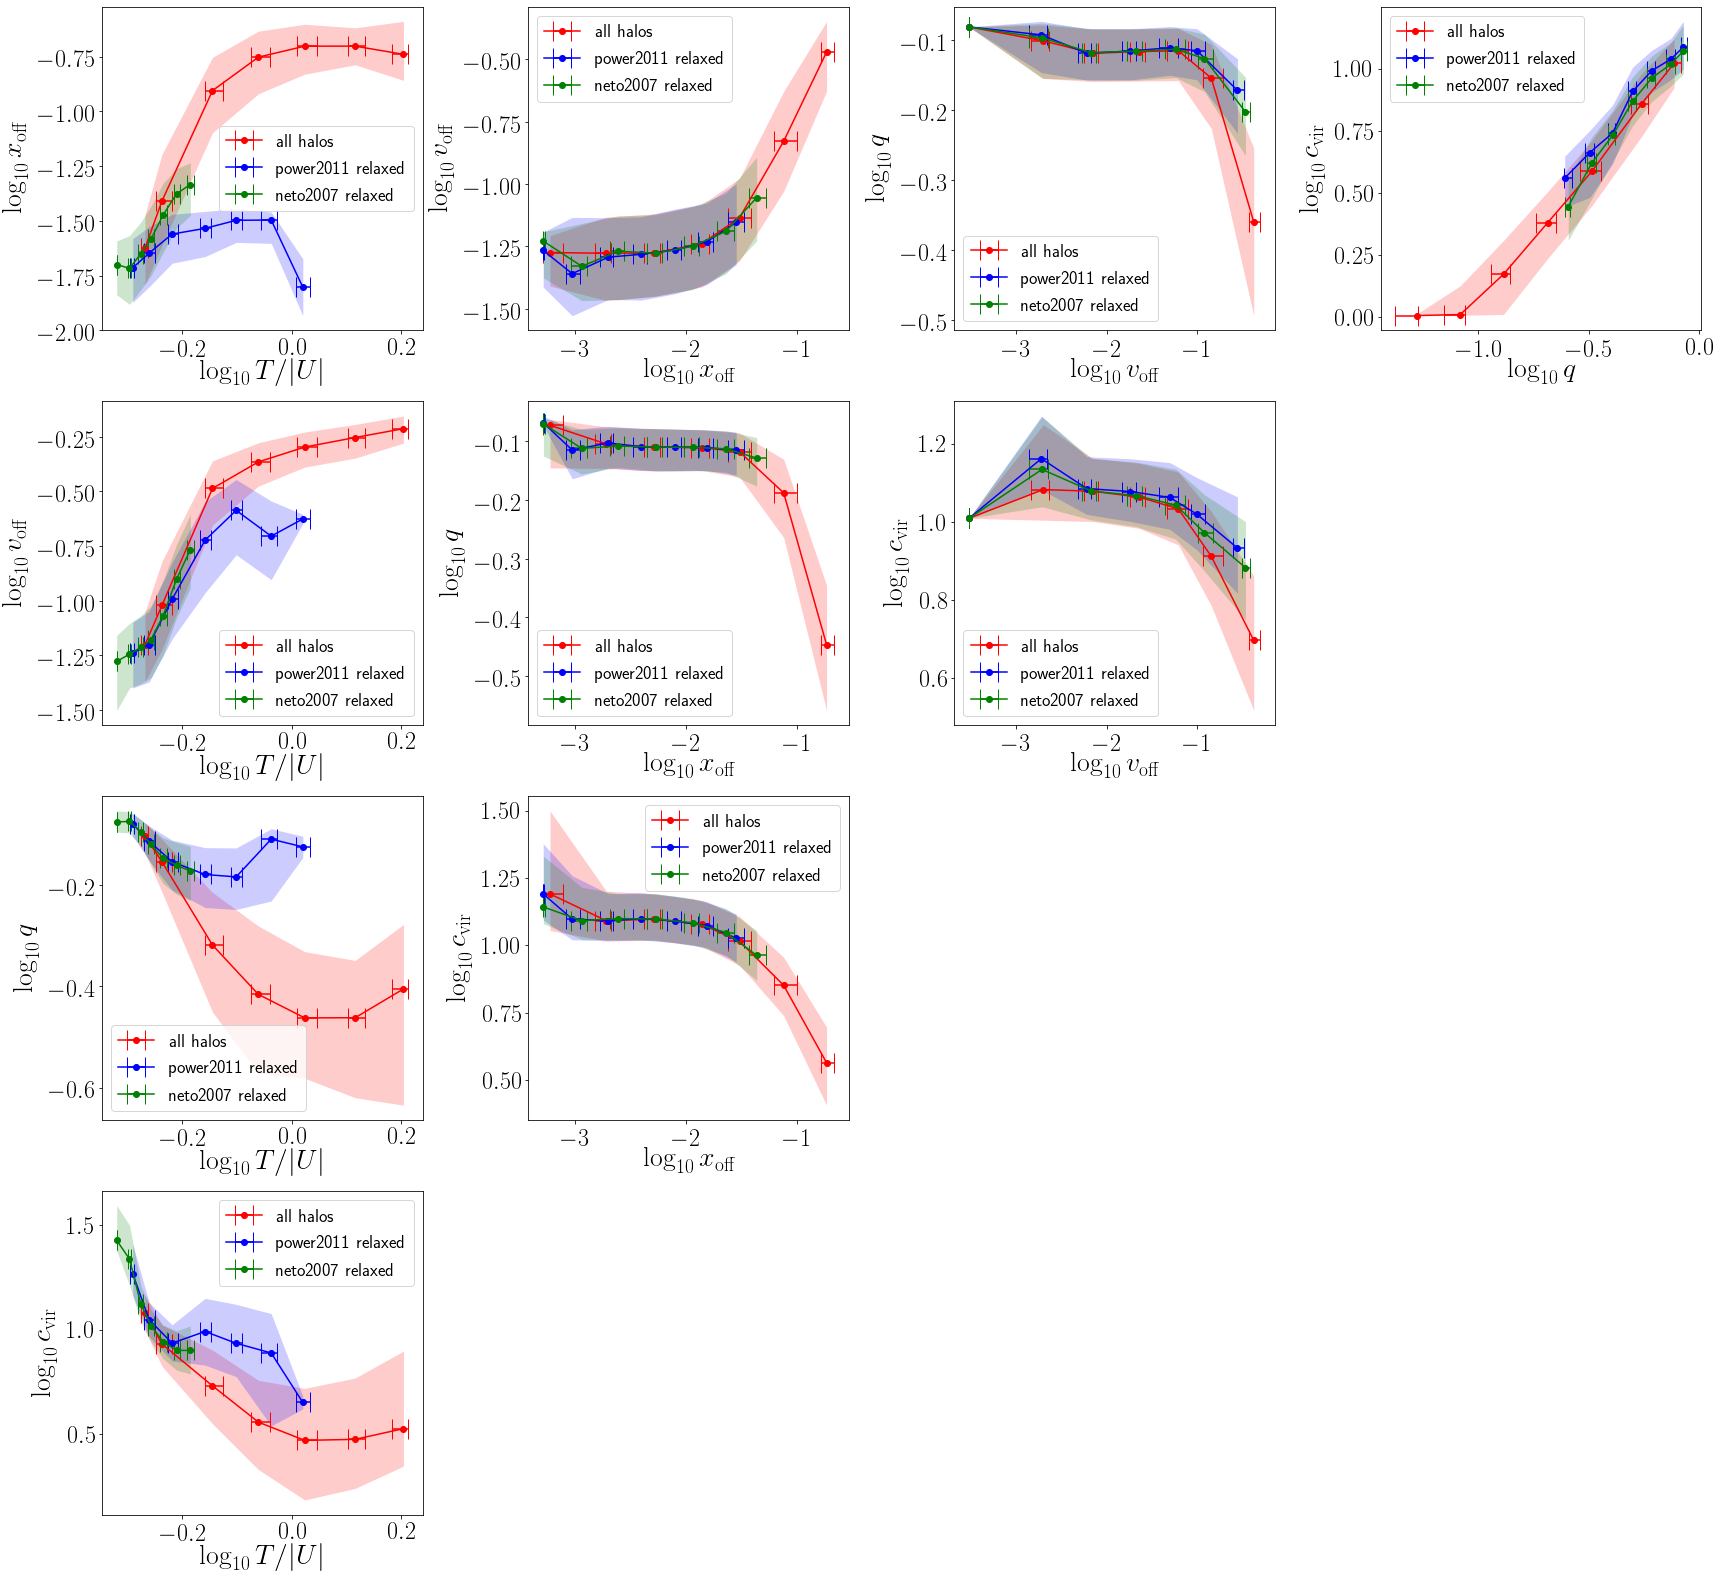

In [10]:
out='test1.pdf'
plt.rc("text", usetex=True)
with PdfPages(const.figure_path.joinpath(out)) as pdf:
    plots1.plot_multiple_basic(hcats, pdf, colors)
    plots1.plot_correlation_matrix_basic(hcats, pdf)
    plots1.plot_decades_basic(hcats, pdf, colors=colors)
